In [1]:
from pylab import *
import numpy as np
from astropy.io import fits
%matplotlib notebook


In [2]:
# hdu = fits.open('data/SB42431/longrun/SB42431_tscrunch_v5.fits') # broken
hdu = fits.open('data/SB42431/longrun/SB42431_tscrunch_v6.fits') # fixed

In [3]:
hdu[0].data.columns

ColDefs(
    name = 'UU'; format = 'E'; bscale = 1.0; bzero = 0.0
    name = 'VV'; format = 'E'; bscale = 1.0; bzero = 0.0
    name = 'WW'; format = 'E'; bscale = 1.0; bzero = 0.0
    name = 'DATE'; format = 'E'; bscale = 1.0; bzero = 2459773.707976192
    name = 'BASELINE'; format = 'E'; bscale = 1.0; bzero = 0.0
    name = 'FREQSEL'; format = 'E'; bscale = 1.0; bzero = 0.0
    name = 'SOURCE'; format = 'E'; bscale = 1.0; bzero = 0.0
    name = 'INTTIM'; format = 'E'; bscale = 1.0; bzero = 0.0
    name = 'DATA'; format = '1728E'; bscale = 1.0; dim = (1, 1, 1, 288, 2, 3)
)

In [4]:
d = hdu[0].data
a1 = 1
a2 = 1
blid = 256*a1 + a2
antdata = d[d['BASELINE'] == blid]['DATA']
antdata.shape

(1000, 1, 1, 1, 288, 2, 3)

In [5]:
s = antdata.shape
antdata.shape = (s[0],s[-3],s[-2],s[-1])
mask =(antdata[:,:,:,2]==0)  | (antdata[:,:,:,0] == 0)# Mask should be weights 
antdata = np.ma.masked_array(antdata[:,:,:,0]+1j*antdata[:,:,:,1], mask=mask)
spec = antdata.mean(axis=0)
spec.shape

(288, 2)

<IPython.core.display.Javascript object>


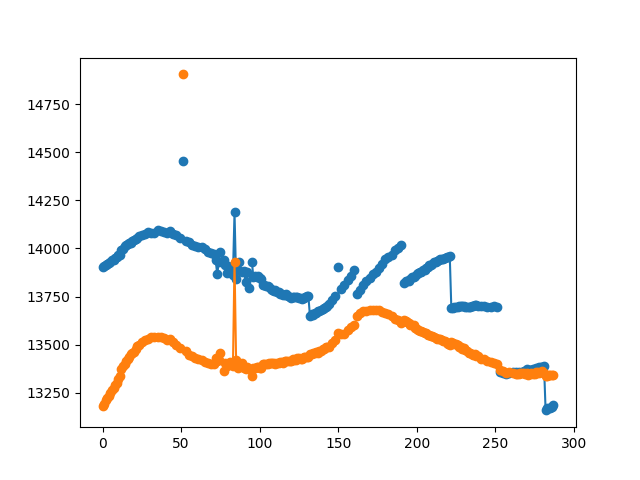

/data/craco/ban115/craco-python/notebooks/baseline-1-1-spec.npy


In [6]:
figure()
plot(spec[:,:].real,'-o')
np.save('baseline-1-1-spec.npy', spec.data)
!realpath baseline-1-1-spec.npy

In [7]:
antdata.shape

(1000, 288, 2)

<IPython.core.display.Javascript object>


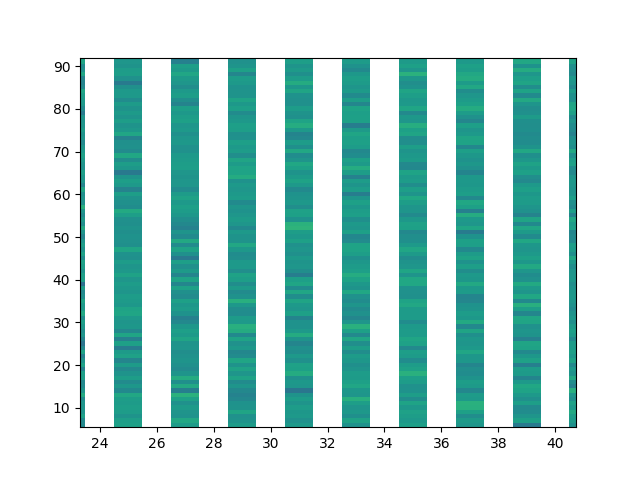

In [8]:
figure()
imshow(antdata[:,:,0].real, aspect='auto',origin='lower')

In [9]:
spec.shape

(288, 2)

In [ ]:
figure()
plot(spec.reshape(12,6,4,2).transpose(0,1,2,3).reshape(288,2).real,'-o')

In [ ]:
spec[:24,0].real

In [ ]:
i = 0
i=24*6
idxs = spec[i:i+24,0].real.argsort()

idxs

In [ ]:
figure()

i=24*4
s= spec[i:i+24,0].real

plot(spec[i:i+24,0].real,'b-')
plot(spec[i:i+24,1].real,'r-')
plot(spec[i:i+24,0][idxs].real,'b--')
plot(spec[i:i+24,1][idxs].real,'r--')


#plot(spec[24:48,0].real)
#plot(spec[idxs+24,0].real)



In [ ]:
idxs

In [ ]:
figure()
plot(idxs)

In [ ]:
idxs.reshape(4,2,3)

In [ ]:
from craco.cardcapmerger import CcapMerger
from glob import glob
files = sorted(glob('data/SB42431/longrun/tscrunch*c*f*.fits'))
merger = CcapMerger(files)
mergerrev = CcapMerger(files[::-1])

In [ ]:
merger.fidxs.shape

In [ ]:
files

In [ ]:
n = 200
d = []
drev = []
theiter = merger.block_iter()
theiterrev = mergerrev.block_iter()
for i in range(n):
    d.append(next(theiter)[1])
    drev.append(next(theiterrev)[1])
    
d = np.ma.masked_array(d)
drev = np.ma.masked_array(drev)

In [ ]:
d.shape

<IPython.core.display.Javascript object>


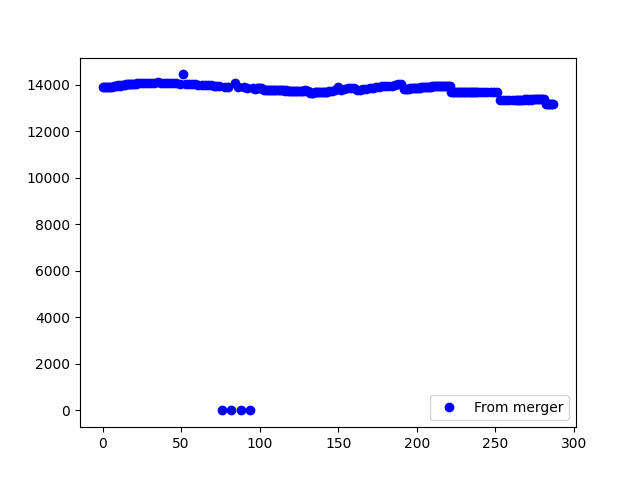

In [43]:
figure()
plot(d[:,:,0,0,0,0,0].mean(axis=0), 'bo',label='From merger')
#plot(drev[:,:,0,0,0,0,0].mean(axis=0), label='From merger (reversed file order)')

#plot(spec[:,0].real, label='from UV fits')
legend()

In [34]:
np.all(drev == d)

True

In [35]:
merger.all_freqs.shape

(72, 1, 4)

<IPython.core.display.Javascript object>


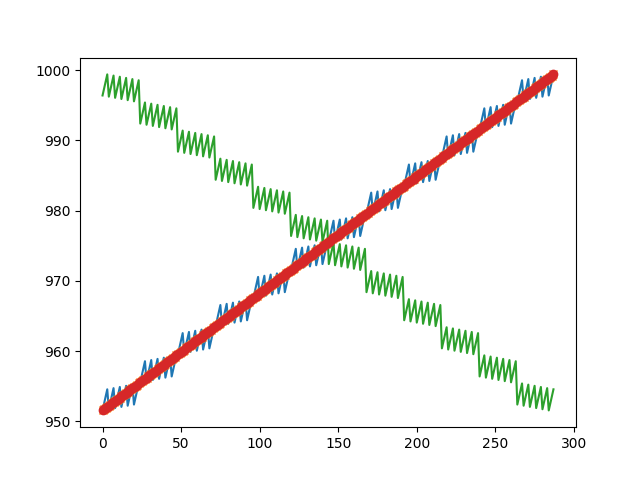

In [36]:
figure()
plot(merger.all_freqs.flatten())
plot(merger.all_freqs.flat[merger.fidxs.flatten()],'x')
plot(mergerrev.all_freqs.flatten())
plot(mergerrev.all_freqs.flat[mergerrev.fidxs.flatten()],'o')

In [37]:
merger.all_freqs.shape

(72, 1, 4)

In [38]:
merger.fidxs.shape

(72, 1, 4)

In [39]:
d.shape

(200, 288, 1, 1, 465, 2, 2)

<IPython.core.display.Javascript object>


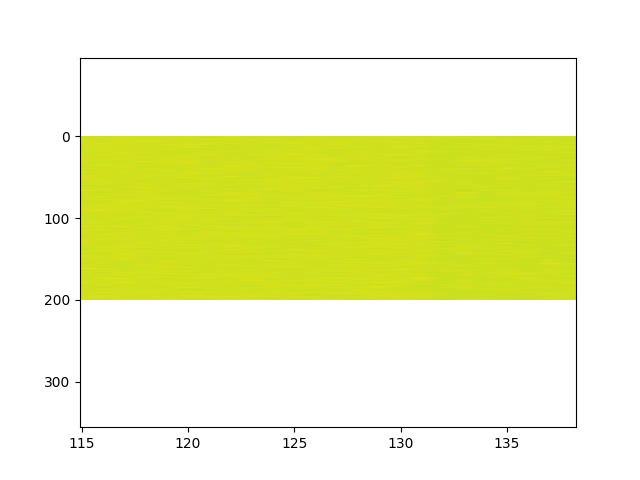

In [40]:
figure()
imshow(d[:,:,0,0,0,0,0], aspect='auto')

In [30]:
type(d)

numpy.ma.core.MaskedArray